In [30]:
import numpy as np

class Game:
    def __init__(self, size=5, deterministic=True):
        """
        Initialize the game

        The game is a 5x5 grid world with the following rewards:
        -1 at 5 random locations
        1 at the top left corner
        1 at the top right corner
        1 at the bottom left corner
        1 at the bottom right corner

        The agent can move up, right, down, or left. If the agent tries to move off the grid, it will stay in the same location.

        The game is over when the agent reaches one of the corners.

        The state space is 25 states, and the action space is 4 actions.

        The game is deterministic.

        The game is implemented as a Markov Decision Process (MDP) with the following attributes:
        - states: a list of all possible states
        - actions: a list of all possible actions
        - rewards: a list of rewards for each state
        - state: the current state of the agent

        The game has the following methods:
        - set_rewards: randomly set the rewards for the game
        - step: take a step in the game
        - reset: reset the game to the starting state
        """
        self.size = size
        self.states = np.arange(self.size**2)
        self.actions = np.arange(4)
        self.rewards = np.zeros(self.size**2)
        self.set_rewards()
        self.state = (self.size**2)//2
        self.deterministic = deterministic


    def set_rewards(self):
        """
        Randomly set the rewards for the game
        """
        for i in range(self.size):
            self.rewards[np.random.randint(0, self.size**2)] = -1
        self.rewards[0] = 1
        self.rewards[self.size-1] = 2
        self.rewards[self.size**2-self.size] = 3
        self.rewards[self.size**2-1] = 4

    def step(self, action):
        """
        Take a step in the game

        Args:
        - action: the action to take (0: up, 1: right, 2: down, 3: left)

        Returns:
        - the new state
        - the reward for the new state
        - whether the game is over
        """
        if self.state == 0 or self.state == self.size-1 or self.state == self.size**2-self.size or self.state == self.size**2-1:
            return self.state, 0, True
        if action == 0 and self.state >= self.size:
            self.state = self.state - self.size
        elif action == 1 and self.state % self.size != self.size-1:
            self.state = self.state + 1
        elif action == 2 and self.state < self.size**2-self.size:
            self.state = self.state + self.size
        elif action == 3 and self.state % self.size != 0:
            self.state = self.state - 1
        return self.state, self.rewards[self.state], False

    def reset(self):
        """
        Reset the game to the starting state
        """
        self.state = 12
        if not self.deterministic:
            self.set_rewards() #if you want to change the rewards every time you reset the game, making it harder and not deterministic
        return self.state



Training q-agent

Rewards:
[ 1.  0. -1.  0.  0.  0. -1.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.
  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 -1.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  3.  0.  0.  0.  0.  0.  0. -1.  0.  4.]
Learned Q-values:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.90000000e-01 -1.99000000e-02  9.80100000e-01  1.00000000e+00]
 [-1.99000000e-02  9.50990050e-01  9.70299000e-01  9.90000000e-01]
 [ 9.50990050e-01  9.41480149e-01  9.60596010e-01 -1.99000000e-02]
 [ 9.41479820e-01  9.32061119e-01  9.50989596e-01  9.50990050e-01]
 [ 9.05516921e-01  3.98160008e-01  9.23198184e-01  9.41479937e-01]
 [-2.93427717e-02  1.74412532e+00  5.13592517e-01  3.81125077e-01]
 [ 1.14833373e+00  1.88999228e+00  3.80501223e-01  2.39971339e-01]
 [ 8.76628695e-01  1.98060453e

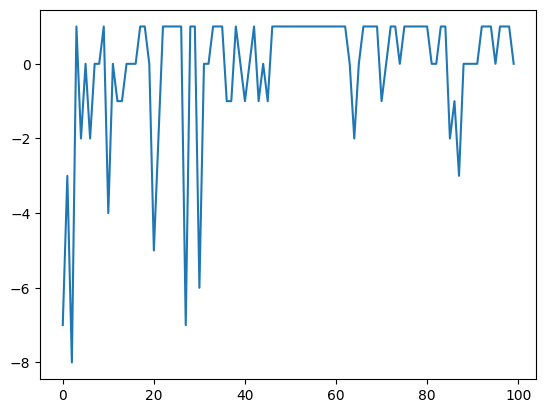

In [54]:
import random
import matplotlib.pyplot as plt
# Initialize the environment
env = Game(10)

# Set parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.6  # Exploration rate
num_episodes = 10000
num_states = env.size**2
num_actions = 4
rewards_seen = []

# Initialize Q-table with zeros
Q = np.zeros((num_states, num_actions))

# Q-learning algorithm
for episode in range(num_episodes):
    state = env.reset()  # Reset environment and get the initial state
    done = False
    total_reward = 0

    while not done:
        state = int(state)  # Ensure the state is an integer

        # Choose action (epsilon-greedy policy)
        if np.random.uniform(0, 1) < epsilon:
            action = random.choice(env.actions) # Explore
        else:
            action = np.argmax(Q[state, :])  # Exploit

        # Take action and observe reward and next state
        next_state, reward, done = env.step(action)
        next_state = int(next_state)  # Ensure the next state is an integer
        total_reward += reward

        # Update Q-value using the Q-learning update rule
        old_value = Q[state, action]
        next_max = np.max(Q[next_state, :])
        Q[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        # Log the details
        #if reward != 0:
        #    print(f"Episode: {episode}, State: {state}, Action: {action}, Reward: {reward}, Next State: {next_state}, Done: {done}, Q-value: {Q[state, action]}")

        # Move to the next state
        state = next_state
        
    #if total_reward != 0:
    #    print(f"Episode {episode} ended with total reward: {total_reward}")
    rewards_seen.append(total_reward)

# Print the rewards table
print("Rewards:")
print(env.rewards)

# Print the learned Q-table
print("Learned Q-values:")
print(Q)

# Print the optimal policy
print("Optimal policy:")
policy = np.argmax(Q, axis=1)
print(policy)

# Print the rewards seen
print("Rewards seen:")
plt.plot(rewards_seen[0:100])

In [55]:
# Checking q-agent performance

accuracy = 0

state = env.reset()  # Reset environment and get the initial state
done = False
total_reward = 0

while not done:
    state = int(state)  # Ensure the state is an integer

    # Choose action (epsilon-greedy policy)
    action = np.argmax(Q[state, :])  # Exploit

    # Take action and observe reward and next state
    next_state, reward, done = env.step(action)
    next_state = int(next_state)  # Ensure the next state is an integer
    total_reward += reward

    # Log the details
    if reward != 0:
        print(f"Episode: {episode}, State: {state}, Action: {action}, Reward: {reward}, Next State: {next_state}, Done: {done}, Q-value: {Q[state, action]}")

    # Move to the next state
    state = next_state

if total_reward >= 0:
        accuracy += total_reward/4

print(f"Accuracy: {accuracy}")

Episode: 9999, State: 1, Action: 3, Reward: 1.0, Next State: 0, Done: False, Q-value: 0.9999999999999996
Accuracy: 0.25


Training z-agent

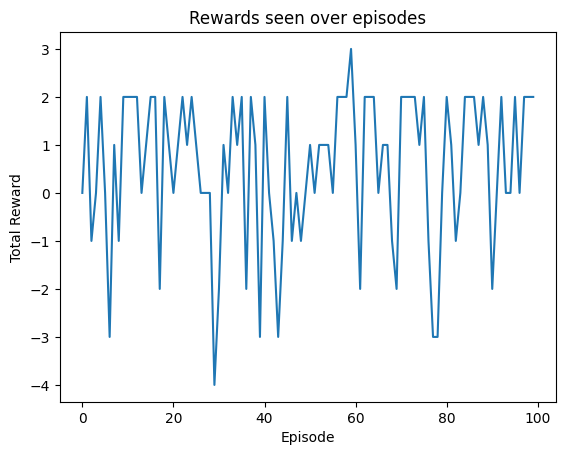

Accuracy: 0.5


In [81]:

class KLearningAgent:
    def __init__(self, num_states, num_actions, alpha=0.1, gamma=0.99, epsilon=0.6, k=10):
        self.num_states = num_states
        self.num_actions = num_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.k = k
        self.Q = np.zeros((num_states, num_actions))

    def select_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return random.choice(range(self.num_actions))  # Explore
        else:
            return np.argmax(self.Q[state])  # Exploit

    def update(self, state, action, reward, next_state, done, steps_remaining):
        if not done:
            next_max = np.max(self.Q[next_state])
            target = reward + self.gamma * next_max
        else:
            target = reward

        self.Q[state, action] += self.alpha * (target - self.Q[state, action])

    def train(self, env, num_episodes):
        rewards_seen = []
        for episode in range(num_episodes):
            state = env.reset()  # Reset environment and get initial state
            total_reward = 0
            done = False
            steps_remaining = self.k

            while not done and steps_remaining > 0:
                action = self.select_action(state)
                next_state, reward, done = env.step(action)
                total_reward += reward
                next_state = int(next_state)  # Ensure next state is an integer
                self.update(state, action, reward, next_state, done, steps_remaining)
                state = next_state
                steps_remaining -= 1

            rewards_seen.append(total_reward)
            if (episode + 1) % 1000 == 0:
                print("Episode:", episode + 1, "Total Reward:", total_reward)

        plt.plot(rewards_seen[0:100])
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.title('Rewards seen over episodes')
        plt.show()
    
    def test(self, env):
        accuracy = 0
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            action = self.select_action(state)
            next_state, reward, done = env.step(action)
            total_reward += reward
            next_state = int(next_state)  # Ensure next state is an integer
            state = next_state
        
        if total_reward >= 0:
            accuracy += total_reward/4
        
        print(f"Accuracy: {accuracy}")


# Initialize the environment
env = Game(5)

# Set parameters
num_episodes = 100

# Initialize Z-learning agent
k_agent = KLearningAgent(num_states=len(env.states), num_actions=len(env.actions), alpha=0.5)

# Train the agent
k_agent.train(env, num_episodes)

# Test the agent
k_agent.test(env)
